In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.shape

(404290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [9]:
(data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

<Axes: >

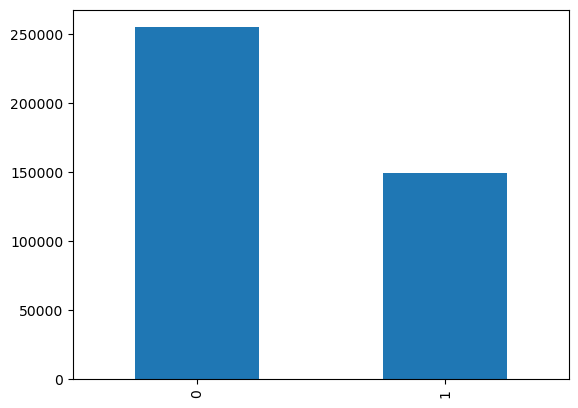

In [10]:
#bar plot of duplicate and non-duplicate questions
data['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())

In [12]:
print("The number of unique questions: {}".format(np.unique(qid).shape[0]))

The number of unique questions: 537933


In [13]:
x = qid.value_counts()>1
print("The number of repitive questions: {}".format(x[x].shape[0]))

The number of repitive questions: 111780


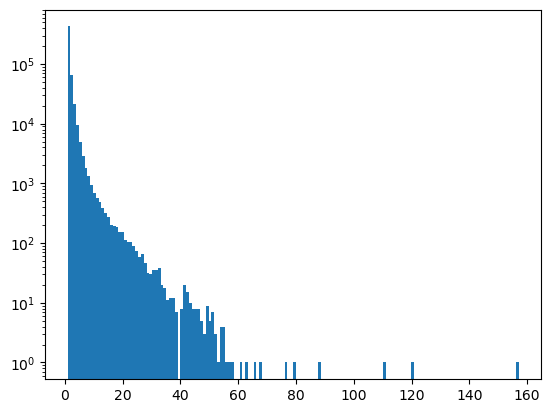

In [14]:
#Histogram plot of unique and repitative questions

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [18]:
new_df = data.sample(30000)

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
358374,358374,487841,487842,Should you cook ham?,What is the best way to cook a ham?,0,20,35,4,9,2,13,0.15
68069,68069,117697,117698,What is a podcast network?,What is a podcast?,0,26,18,5,4,3,9,0.33
13148,13148,25270,25271,Why India still using its tattered reservation...,Do we still need reservation in INDIA? Why?,1,56,43,8,8,2,16,0.12
368572,368572,196554,104091,Which is the best answer you read on Quora?,What's the best answer in Quora?,1,43,32,9,6,4,15,0.27
165373,165373,256809,200029,What else can I do to remove a particular ques...,How can I stop seeing a question in my feed wi...,1,95,66,17,13,7,30,0.23


In [20]:
new_df['q1_len'] = new_df['question1'].str.len()

In [21]:
new_df['q2_len'] = new_df['question2'].str.len()

In [22]:
new_df['q1_words'] = new_df['question1'].apply(lambda x: len(x.split(" ")))

In [23]:
new_df['q2_words'] = new_df['question2'].apply(lambda x: len(x.split(" ")))

In [24]:
def common_words(row):
    l1 = set(row['question1'].lower().strip().split(" "))
    l2 = set(row['question2'].lower().strip().split(" "))
    return len(l1 & l2)

In [25]:
def total_words(row):
    k1 = set(row['question1'].lower().strip().split(" "))
    k2 = set(row['question2'].lower().strip().split(" "))
    return len(k1) + len(k2)

In [26]:
new_df['common_words'] = new_df.apply(common_words, axis=1)

In [27]:
new_df['total_words'] = new_df.apply(total_words, axis=1)

In [28]:
new_df['word_share'] = round(new_df['common_words']/new_df['total_words'],2)

In [30]:
import seaborn as sns

maximum characters:  623
minimum characters:  1


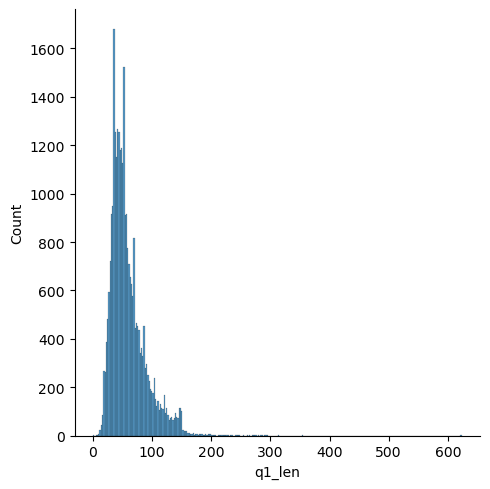

In [34]:
sns.displot(new_df['q1_len'])
print("maximum characters: ",new_df['q1_len'].max())
print("minimum characters: ",new_df['q1_len'].min())